In [0]:
# this vestion has minimal modifications by wz 
# original: https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb 

##### Copyright 2018 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
# Copyright 2018 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# Universal Sentence Encoder


<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>


This notebook illustrates how to access the Universal Sentence Encoder and use it for sentence similarity and sentence classification tasks.

The Universal Sentence Encoder makes getting sentence level embeddings as easy as it has historically been to lookup the embeddings for individual words. The sentence embeddings can then be trivially used to compute sentence level meaning similarity as well as to enable better performance on downstream classification tasks using less supervised training data.


# Getting Started

This section sets up the environment for access to the Universal Sentence Encoder on TF Hub and provides examples of applying the encoder to words, sentences, and paragraphs.

In [0]:
# Install the latest Tensorflow version.
!pip3 install --quiet "tensorflow>=1.7"
# Install TF-Hub.
!pip3 install --quiet tensorflow-hub
!pip3 install --quiet seaborn

More detailed information about installing Tensorflow can be found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/).

In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [0]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [6]:
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

# Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  message_embeddings = session.run(embed(messages))

  for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size: {}".format(len(message_embedding)))
    message_embedding_snippet = ", ".join(
        (str(x) for x in message_embedding[:3]))
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [-0.016987264156341553, -0.008949835784733295, -0.007062749937176704, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.035313334316015244, -0.025384267792105675, -0.007880029268562794, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [0.01879096031188965, 0.045365188270807266, -0.020010896027088165, ...]



# TRYING RQE DATA \#WZ

"""
<pair pid="8567" type="originalQ-shortRandQ" value="false">
<chq>   What is the latest information about the treatment of adolescent migraines?</chq>
<faq>   Boys' father has Marfan's Syndrome. Do these boys need further evaluation?</faq></pair>

<pair pid="8568" type="originalQ-shortQ" value="true">
<chq>   What are the procedures for single ventricle heart in a baby? What kind of heart surgery?</chq>
<faq>   What are the procedures for single ventricle?</faq></pair>

<pair pid="142" type="originalQ-shortQ" value="true">
<chq>   This patient has a history of irregular heart beat, bigeminy and trigeminy.  
He's having a few brief runs occasionally now.  On Quinidine in the past.  Should I treat these?</chq>
<faq>   Patient with bigeminy and trigeminy.  Should I treat these?</faq></pair>
"""

In [7]:
# Compute a representation for each message, showing various lengths supported.

sentCHQ = "What are the procedures for single ventricle heart in a baby? What kind of heart surgery?"
sentFAQ = "What are the procedures for single ventricle?"
paragraph12 = (
    "This patient has a history of irregular heart beat, bigeminy and trigeminy."
    "He's having a few brief runs occasionally now."  
    "On Quinidine in the past.  Should I treat these?")

messages = [sentFAQ, sentCHQ, paragraph12]

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  message_embeddings = session.run(embed(messages))

  for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size: {}".format(len(message_embedding)))
    message_embedding_snippet = ", ".join(
        (str(x) for x in message_embedding[:3]))
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: What are the procedures for single ventricle?
Embedding size: 512
Embedding: [0.03590632602572441, 0.04430503025650978, -0.022160768508911133, ...]

Message: What are the procedures for single ventricle heart in a baby? What kind of heart surgery?
Embedding size: 512
Embedding: [0.020953187718987465, 0.05497196316719055, -0.017116177827119827, ...]

Message: This patient has a history of irregular heart beat, bigeminy and trigeminy.He's having a few brief runs occasionally now.On Quinidine in the past.  Should I treat these?
Embedding size: 512
Embedding: [-0.01690036430954933, -0.010946848429739475, 0.014777802862226963, ...]



In [8]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

eCHQ= message_embeddings[0].reshape(1, -1)
eFAQ= message_embeddings[1].reshape(1, -1)
ePar =message_embeddings[2].reshape(1, -1)

print(cosine_similarity(eCHQ,eFAQ))
print(cosine_similarity(eCHQ,ePar))
print(cosine_similarity(eFAQ,ePar))

[[0.84078336]]
[[0.54161525]]
[[0.4907534]]


# END OF TRYING RQE DATA #WZ

# Semantic Textual Similarity Task Example

The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.

In [0]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")


def run_and_plot(session_, input_tensor_, messages_, encoding_tensor):
  message_embeddings_ = session_.run(
      encoding_tensor, feed_dict={input_tensor_: messages_})
  plot_similarity(messages_, message_embeddings_, 90)

## Similarity Visualized
Here we show the similarity in a heat map. The final graph is a 9x9 matrix where each entry `[i, j]` is colored based on the inner product of the encodings for sentence `i` and `j`.

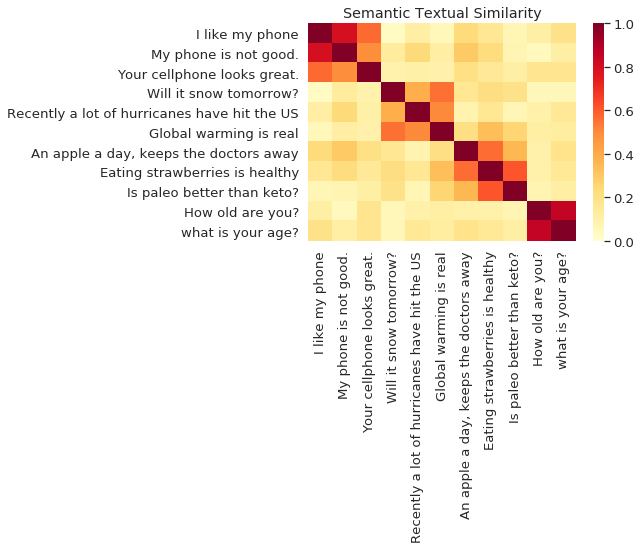

In [10]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]


similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, messages,
               similarity_message_encodings)

## Evaluation: STS (Semantic Textual Similarity) Benchmark

The [**STS Benchmark**](http://ixa2.si.ehu.es/stswiki/index.php/STSbenchmark) provides an intristic evaluation of the degree to which similarity scores computed using sentence embeddings align with human judgements. The benchmark requires systems to return similarity scores for a diverse selection of sentence pairs. [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is then used to evaluate the quality of the machine similarity scores against human judgements.

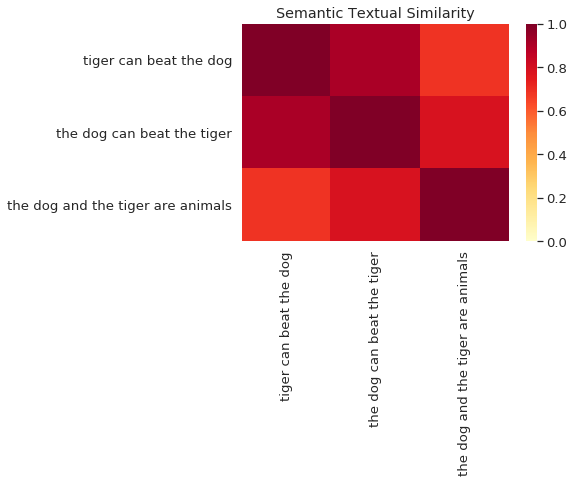

In [23]:
messages = [
    # Smartphones
    "tiger can beat the dog",
    "the dog can beat the tiger",
    "the dog and the tiger are animals"

  ]


similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, messages,
               similarity_message_encodings)

## Similarity Visualized
Here we show the similarity in a heat map. The final graph is a 9x9 matrix where each entry `[i, j]` is colored based on the inner product of the encodings for sentence `i` and `j`.

### Download data

In [11]:
import pandas
import scipy
import math


def load_sts_dataset(filename):
  # Loads a subset of the STS dataset into a DataFrame. In particular both
  # sentences and their human rated similarity score.
  sent_pairs = []
  with tf.gfile.GFile(filename, "r") as f:
    for line in f:
      ts = line.strip().split("\t")
      # (sent_1, sent_2, similarity_score)
      sent_pairs.append((ts[5], ts[6], float(ts[4])))
  return pandas.DataFrame(sent_pairs, columns=["sent_1", "sent_2", "sim"])


def download_and_load_sts_data():
  sts_dataset = tf.keras.utils.get_file(
      fname="Stsbenchmark.tar.gz",
      origin="http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz",
      extract=True)

  sts_dev = load_sts_dataset(
      os.path.join(os.path.dirname(sts_dataset), "stsbenchmark", "sts-dev.csv"))
  sts_test = load_sts_dataset(
      os.path.join(
          os.path.dirname(sts_dataset), "stsbenchmark", "sts-test.csv"))

  return sts_dev, sts_test


sts_dev, sts_test = download_and_load_sts_data()

417792/409630 [==============================] - 2s 4us/step


In [12]:
#wz

!ls -lth
!ls -lth ./sample_data/

total 4.0K
drwxr-xr-x 1 root root 4.0K Feb  5 18:37 sample_data
total 55M
-rw-r--r-- 1 root root  18M Feb  5 18:37 mnist_test.csv
-rw-r--r-- 1 root root  35M Feb  5 18:37 mnist_train_small.csv
-rw-r--r-- 1 root root 295K Feb  5 18:37 california_housing_test.csv
-rw-r--r-- 1 root root 1.7M Feb  5 18:37 california_housing_train.csv
-rwxr-xr-x 1 root root 1.7K Jan  1  2000 anscombe.json
-rwxr-xr-x 1 root root  930 Jan  1  2000 README.md


In [13]:
#wz 
print(sts_test)


                                                 sent_1  ...  sim
0                           A girl is styling her hair.  ...  2.5
1              A group of men play soccer on the beach.  ...  3.6
2         One woman is measuring another woman's ankle.  ...  5.0
3                       A man is cutting up a cucumber.  ...  4.2
4                              A man is playing a harp.  ...  1.5
...                                                 ...  ...  ...
1374  Philippines, Canada pledge to further boost re...  ...  0.0
1375  Israel bars Palestinians from Jerusalem's Old ...  ...  1.0
1376         How much do you know about Secret Service?  ...  1.0
1377  Obama Struggles to Soothe Saudi Fears As Iran ...  ...  0.0
1378          South Korea declares end to MERS outbreak  ...  0.0

[1379 rows x 3 columns]


### Build Evaluation Graph

In [0]:
sts_input1 = tf.placeholder(tf.string, shape=(None))
sts_input2 = tf.placeholder(tf.string, shape=(None))

# For evaluation we use exactly normalized rather than
# approximately normalized.
sts_encode1 = tf.nn.l2_normalize(embed(sts_input1), axis=1)
sts_encode2 = tf.nn.l2_normalize(embed(sts_input2), axis=1)
cosine_similarities = tf.reduce_sum(tf.multiply(sts_encode1, sts_encode2), axis=1)
clip_cosine_similarities = tf.clip_by_value(cosine_similarities, -1.0, 1.0)
sim_scores = 1.0 - tf.acos(clip_cosine_similarities)

### Evaluate Sentence Embeddings

In [0]:
sts_data = sts_dev #@param ["sts_dev", "sts_test"] {type:"raw"}

In [16]:
# wz slight modification of next cell

text_a = sts_data['sent_1'].tolist()
text_b = sts_data['sent_2'].tolist()
dev_scores = sts_data['sim'].tolist()

print(text_a[:3])
print(text_b[:3])
print(dev_scores[:3])

print()
print(text_a[123:127])
print(text_b[123:127])
print(dev_scores[123:127])

['A man with a hard hat is dancing.', 'A young child is riding a horse.', 'A man is feeding a mouse to a snake.']
['A man wearing a hard hat is dancing.', 'A child is riding a horse.', 'The man is feeding a mouse to the snake.']
[5.0, 4.75, 5.0]

['A man jumping rope', 'A woman is peeling an orange.', 'Someone is beating an egg.', 'A man is cutting a potato.']
['A man is talking.', 'A woman cuts off a small piece of lemon rind.', 'A woman stirs eggs in a bowl.', 'A woman plays an electric guitar.']
[0.4, 1.8, 2.5, 0.083]


In [17]:
""" ORIGINAL
text_a = sts_data['sent_1'].tolist()
text_b = sts_data['sent_2'].tolist()
dev_scores = sts_data['sim'].tolist()
"""


def run_sts_benchmark(session):
  """Returns the similarity scores"""
  emba, embb, scores = session.run(
      [sts_encode1, sts_encode2, sim_scores],
      feed_dict={
          sts_input1: text_a,
          sts_input2: text_b
      })
  return scores


with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  scores = run_sts_benchmark(session)

pearson_correlation = scipy.stats.pearsonr(scores, dev_scores)
print('Pearson correlation coefficient = {0}\np-value = {1}'.format(
    pearson_correlation[0], pearson_correlation[1]))

Pearson correlation coefficient = 0.7629206953838309
p-value = 4.519743817546783e-286


In [18]:
#wz
print(scores)

[0.81275153 0.79511225 0.6856102  ... 0.02519614 0.08812535 0.29005426]


Next steps: RQE data -> csv files
get similarity scores 


## Below we are trying to encode a whole book. 

Not sure if it actually works -- that is 'similar' books (e.g. 'true crime') have higher similarity scores than 'true crime' and 'romance'.   

But the process doesn't crash the encoder.

In [0]:
# !wget http://www.gutenberg.org/cache/epub/60541/pg60541.txt
# don't do it in class, 
# if everyone in class will try to get it at the same time, duke.edu might be blocked from gutenberg.org

In [20]:
fn = "/content/pg60541.txt"
fi = open("/content/pg60541.txt", 'r')
text = fi.read()

paragraph=[]
with open("/content/pg60541.txt",'r') as fi:
  for line in fi:
    paragraph.append(line)
    

FileNotFoundError: ignored

In [0]:
paragraph

In [0]:
messages = [sentFAQ, sentCHQ, paragraph]

In [0]:
with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  message_embeddings = session.run(embed(messages))

  for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size: {}".format(len(message_embedding)))
    message_embedding_snippet = ", ".join(
        (str(x) for x in message_embedding[:3]))
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))